# Exercise 2: Decision Trees

In this assignment you will implement a Decision Tree algorithm as learned in class.

## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
2. Write vectorized code whenever possible.
3. You are responsible for the correctness of your code and should add as many tests as you see fit. Tests will not be graded nor checked.
4. Write your functions in the provided `hw2.py` python module only. All the logic you write is imported and used in this jupyter notebook.
5. You are allowed to use functions and methods from the [Python Standard Library](https://docs.python.org/3/library/) and [numpy](https://www.numpy.org/devdocs/reference/) only. Any other imports detected in `hw2.py` will earn you the grade of 0, even if you only used them for testing.
6. Your code must run without errors. During the environment setup, you were given a specific version of `numpy` to install. Changes of the configuration we provided are at your own risk. Code that cannot run will also earn you the grade of 0.
7. Write your own code. Cheating will not be tolerated. 
8. Submission includes the `hw2.py` file and this notebook. Answers to qualitative questions should be written in markdown cells (with $\LaTeX$ support).
9. You are allowed to include additional functions.
10. Submission: zip only the completed jupyter notebook and the python file `hw2.py`. Do not include the data or any directories. Name the file `ID1_ID2.zip` and submit only one copy of the assignment.

## In this exercise you will perform the following:
1. Practice OOP in python.
2. Implement two impurity measures: Gini and Entropy.
3. Implement a decision tree from scratch.
4. Prune the tree to achieve better results.
5. Visualize your results and the tree.

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hw2 import * # this imports all functions from hw2.

# make matplotlib figures appear inline in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Make the notebook automatically reload external python modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Warmup - OOP in python

Our decision tree will be implemented using a dedicated python class. Python classes are very similar to classes in Java.


You can use the following [site](https://jeffknupp.com/blog/2014/06/18/improve-your-python-python-classes-and-object-oriented-programming/) to learn about classes in python.

In [26]:
class Node(object):
    def __init__(self, data):
        self.data = data 
        self.children = []
    def add_child(self, node):
        self.children.append(node)

In [27]:
n = Node(5)
p = Node(6)
q = Node(7)
n.add_child(p)
n.add_child(q)
n.children

[<__main__.Node at 0x296b836a400>, <__main__.Node at 0x296bae730f0>]

## Data preprocessing

We will use the breast cancer dataset that is available as a part of sklearn - a popular machine learning and data science library in python. In this example, our dataset will be a single matrix with the **labels on the last column**. Notice that you are not allowed to use additional functions from sklearn.

In [28]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# load dataset
X, y = datasets.load_breast_cancer(return_X_y = True)
X = np.column_stack([X,y]) # the last column holds the labels

# split dataset
X_train, X_test = train_test_split(X, random_state=99)

print("Training dataset shape: ", X_train.shape)
print("Testing dataset shape: ", X_test.shape)

Training dataset shape:  (426, 31)
Testing dataset shape:  (143, 31)


## Impurity Measures

Implement the functions `calc_gini` (5 points) and `calc_entropy` (5 points) in the python file `hw2.py`. You are encouraged to test your implementation using the cell below.

In [29]:
gini = calc_gini(X_train)
print("gini measure:",gini)
entropy = calc_entropy(X_train)
print("entropy measure:",entropy)

gini measure: 0.47768299940488
entropy measure: 0.6706611269042888


## Building a Decision Tree

Use a Python class to construct the decision tree (look at the `DecisionNode` class in the python file `hw2.py`. Your class should support the following functionality:

1. Initiating a node for a decision tree. You will need to use several class methods and class attributes and you are free to use them as you see fit. We recommend that every node will hold the feature and value used for the split and its children.
2. Your code should support both Gini and Entropy as impurity measures. 
3. The provided data includes continuous data. In this exercise, create at most a single split for each node of the tree. The threshold you need to use for this exercise are the average of each consecutive pair of values. For example, assume some features contains the following values: [1,2,3,4,5]. You should use the following thresholds [1.5, 2.5, 3.5, 4.5]. 
4. When constructing the tree, test all possible thresholds for each feature. The stopping criteria is a pure tree.

Complete the class `DecisionNode` in the python file `hw2.py`. The structure of this class is entirely up to you. Complete the function `build_tree` in the python file `hw2.py`. This function should get the training dataset and the impurity as inputs, initiate a root for the decision tree and construct the tree according to the procedure you learned in class. (30 points).

In [30]:
# python support passing a function as arguments to another function.

tree_gini, leaves = build_tree(data=X_train, impurity=calc_gini) 
tree_entropy, leaves = build_tree(data=X_train, impurity=calc_entropy)

## Tree evaluation

Complete the functions `predict` and `calc_accuracy` in the python file `hw2.py`. You are allowed to implement this functionality as a class method.

After building both trees using the training set (using Gini and Entropy as impurity measures), you should calculate the accuracy on the test set and print the measure that gave you the best test accuracy. For the rest of the exercise, use that impurity measure. (10 points)

In [31]:
gini = calc_accuracy(tree_gini, X_test)
entropy = calc_accuracy(tree_entropy, X_test)
if gini > entropy:
    print("gini:",gini)
else:
    print("entropy:",entropy)

entropy: 0.9370629370629371


## Chi square pre-pruning

Consider the following p-value cut-off values: [1 (no pruning), 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00001]. For each value, construct a tree and prune it according to the cut-off value. Next, calculate the training and testing accuracy. On a single plot, draw the training and testing accuracy as a function of the p-value. What p-value gives you the best results? Does the results support the theory you learned in class regarding Chi square pruning? Explain. (20 points)

**Note**: You need to change the `DecisionNode` to support Chi square pruning. Make sure the `chi_value=1` corresponds to no pruning. The values you need from the Chi square table are available in the python file `hw2.py`.

In [32]:
def chi_square(node, a, b):
    chi_square = 0
    D = len(node.data)
    P1 = sum(node.data[:,-1]) / D
    P0 = (D - sum(node.data[:,-1])) / D
    p_a = (len(a) - sum(a[:,-1])) 
    p_b = (len(b) - sum(b[:,-1]))
    n_a = sum(a[:,-1])
    n_b = sum(b[:,-1])
    E0_a = len(a) * P0
    E1_a = len(a) * P1
    E0_b = len(b) * P0
    E1_b = len(b) * P1
    chi_a = (((p_a - E0_a)**2)/E0_a) + (((n_a - E1_a)**2)/E1_a)
    chi_b = (((p_b - E0_b)**2)/E0_b) + (((n_b - E1_b)**2)/E1_b)
    chi_square = chi_a + chi_b
    return chi_square
                       

def build_tree_chi(data, impurity, chi_value):
    root = None
    root = DecisionNode(None,None)
    root.data = data
    build_tree_2_chi(root, impurity, chi_value)
    return root

def build_tree_2_chi(node, impurity, chi_value):
    if impurity(node.data) == 0:
        return node
    feature, split_value, a, b = find_best_split(node.data, impurity)
    node.value = split_value
    node.feature = feature
    if chi_square(node, a, b) >= chi_value:
        node_a = DecisionNode(None,None)
        node_a.data = a
        node_b = DecisionNode(None,None)
        node_b.data = b
        node.add_child(node_a)
        node.add_child(node_b)
        build_tree_2_chi(node_a, impurity, chi_value)
        build_tree_2_chi(node_b, impurity, chi_value)
    return node

In [33]:
training = []
testing  = []

for chi_value in [1, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00001]:
    if chi_value == 1:
        tree, leaves = build_tree(X_train, calc_entropy)
        testing.append(calc_accuracy(tree,X_test))
        training.append(calc_accuracy(tree,X_train))
    else:    
        tree = build_tree_chi(X_train, calc_entropy, chi_table.get(chi_value))
        testing.append(calc_accuracy(tree,X_test))
        training.append(calc_accuracy(tree,X_train))

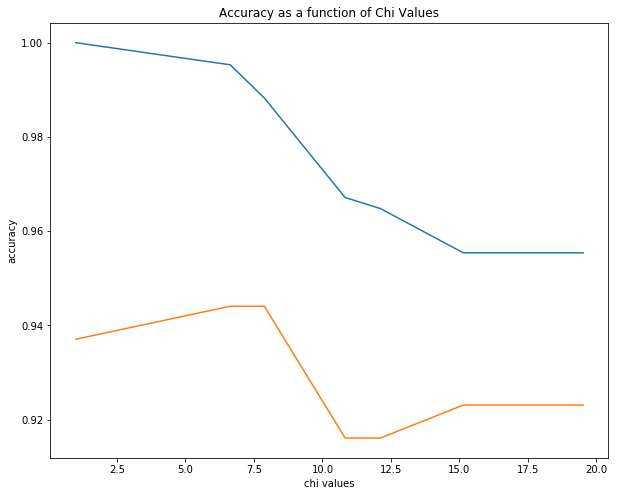

In [34]:
training = np.array(training)
x = np.array([1, 6.635, 7.879, 10.828, 12.116, 15.140, 19.511])
plt.plot(x, training)
plt.title('Accuracy as a function of Chi Values')
testing = np.array(testing)
x = np.array([1, 6.635, 7.879, 10.828, 12.116, 15.140, 19.511])
plt.plot(x, testing)
plt.ylabel('accuracy')
plt.xlabel('chi values')
plt.show()

ANSWER:

The chi-Value of around 0.01 gives us the best accuracy on the testing set. As expected, at first pruning the graph lowers our training accuracy (obviously), but improves the testing accuracy as our tree becomes a better clasiffier for "reality" (lowers over-fitting). However, once we continue to prune with higher chi-values over our "best accuracy threshold", as the tree becomes smaller, so does the accuracy of the predictions of the testing set.
In order to find the optimal Chi-value, we can keep track of the greatest accuracy on the testing set during the run.
We can improve our accuracy in several ways. First of all, now that we have seen that around 7.5 the testing accuracy is at its best, we can "zoom in" and try smaller-increment numbers between 6.5 and 9 for example, to get to a more exact best chi-value.
Furthermore, we could use several different random testing sets, and compare our accuracy values as a function of chi-values between the different sets. Thus we can further fine-tune our findings and use the best chi-value we can.

## Post pruning

Construct a decision tree without Chi square pruning. For each leaf in the tree, calculate the test accuracy of the tree assuming no split occurred on the parent of that leaf and find the best such parent (in the sense that not splitting on that parent results in the best testing accuracy among possible parents). Make that parent into a leaf and repeat this process until you are left with just the root. On a single plot, draw the training and testing accuracy as a function of the number of internal nodes in the tree. Explain the results: what would happen to the training and testing accuracies when you remove nodes from the tree? Can you suggest a different approach to achieve better results? (20 points)

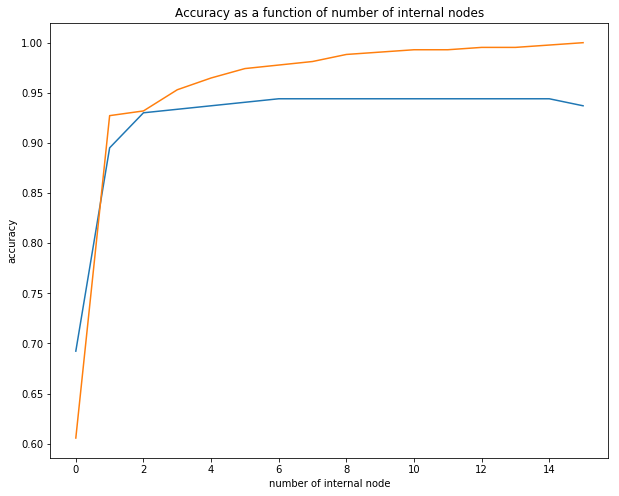

In [35]:
accuracy_test, internal_nodes_test = prune_tree(X_train, X_test)
accuracy_train, internal_nodes_train = prune_tree(X_train, X_train)

accuracy_test = np.array(accuracy_test)
x = np.array(internal_nodes_test)
plt.plot(x, accuracy_test)
plt.title('Accuracy as a function of number of internal nodes')
accuracy_train = np.array(accuracy_train)
x = np.array(internal_nodes_train)
plt.plot(x, accuracy_train)
plt.ylabel('accuracy')
plt.xlabel('number of internal node')
plt.show()

ANSWER:
We read the graph from right to left, as our algorithm first builds the graph and only then prunes parents, as needed. As expected, the first prunings lower the training accuracy, but raise the testing accuracy. This is as once again, our decision tree lowers its overfitting and becomes more fit for "reality" and less for the specific data it was built on. At a certain point in the pruning, the testing accuracy begins to drop as well, as our tree becomes "less efficient" in its prediction. 
The ideal number of internal nodes seems to be between 7-10, at which point our testing accuracy is at its highest.
In order to optimize the method, we can continue to record the accuracy result as we do, but stop the pruning at the first iteration in which the testing accuracy drops. That is, take the exact pruned tree on which the prediction accuracy on the testing set is at its highest.
In order to improve the results, we can increase the size and amount of testing sets we use. This will give us a lower chance of "extreme outliers" in our data, as well as more tests on just how much to prune the tree after creating it. Once we reach optimal accuracy percentages between the different testing sets, we will have made a tree that we know is optimally predictive of reality and less fitted directly to the data it was built with.

## Print the tree

Complete the function `print_tree` in the python file `hw2.py` and print the tree using the chosen impurity measure and no pruning. Your code should like something like this (10 points):
```
[X0 <= 1],
  [X1 <= 2]
    [X2 <= 3], 
       leaf: [{1.0: 10}]
       leaf: [{0.0: 10}]
    [X4 <= 5], 
       leaf: [{1.0: 5}]
       leaf: [{0.0: 10}]
   leaf: [{1.0: 50}]
```


In [36]:
tree = build_tree_chi(X_train, calc_entropy, 10)
print_tree(tree,0)

 [X27 <= 0.14235]
	 [X3 <= 696.25]
		 [X27 <= 0.1349]
			 [X10 <= 0.62555]
				 [X21 <= 33.349999999999994]
					 Leaf: [{1: 216}]
					 [X21 <= 33.56]
						 Leaf: [{0: 1}]
						 Leaf: [{1: 17}]
				 Leaf: [{1: 3}]
			 Leaf: [{1: 11}]
		 [X1 <= 19.72]
			 [X6 <= 0.073105]
				 Leaf: [{1: 7}]
				 Leaf: [{0: 3}]
			 Leaf: [{0: 13}]
	 [X13 <= 21.924999999999997]
		 [X21 <= 29.0]
			 Leaf: [{1: 9}]
			 Leaf: [{0: 5}]
		 [X4 <= 0.079285]
			 Leaf: [{1: 1}]
			 Leaf: [{0: 140}]
